#💼Employee Salary Prediction using adult csv

**Data Loading**


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the dataset
data=pd.read_csv("/content/adult.csv")

**Data Inspection**

In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


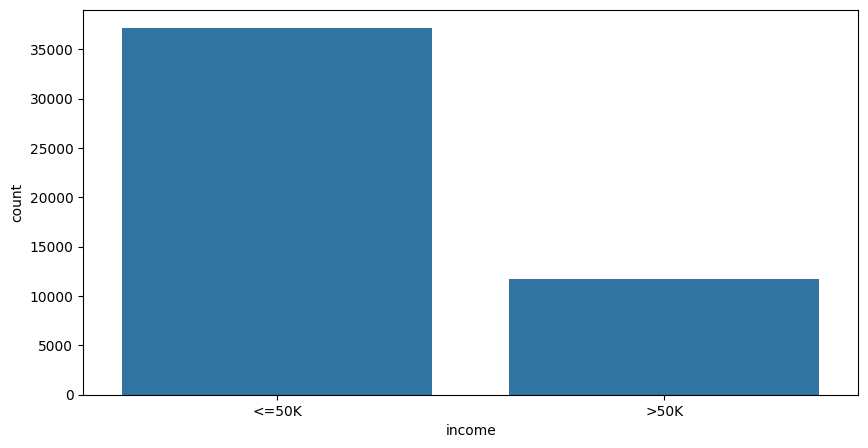

In [ ]:
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.countplot(x = data['income'])
plt.show()

In [ ]:
# Display basic descriptive statistics for numerical features
print(data.describe())

                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


In [ ]:
data.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
#finding null values
for column in data.columns:
    if (data[column] == '?').any():
        print(f"Column '{column}' has {(data[column] == '?').sum()} missing values ('?').")

Column 'workclass' has 2799 missing values ('?').
Column 'occupation' has 2809 missing values ('?').
Column 'native-country' has 857 missing values ('?').


In [ ]:
data.nunique()

,0
age,74
workclass,9
fnlwgt,28523
education,16
educational-num,16
marital-status,7
occupation,15
relationship,6
race,5
gender,2


In [ ]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [ ]:
print(data['education'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


#Handling Missing Values and Redundant Categories

In [ ]:
data['occupation'] = data['occupation'].replace({'?':'others'})

In [ ]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
data['native-country'] = data['native-country'].replace({'?':'others'})

In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
data['workclass'] = data['workclass'].replace({'?':'others'})

In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


#Data Selection and Filtering

In [ ]:
# Removing Redundant Workclass Categories
data=data[data['workclass'] != 'Without-pay' ]
data=data[data['workclass'] != 'Never-worked' ]

In [ ]:
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
data.shape

(48811, 15)

In [ ]:
# Removing Redundant Education Categories
data=data[data['education'] != '5th-6th' ]
data=data[data['education'] != '1st-4th' ]
data=data[data['education'] != 'Preschool' ]

In [ ]:
print(data['education'].value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [ ]:
data.shape

(47972, 15)

In [ ]:
data.iloc[4:20, 1:5]

,workclass,fnlwgt,education,educational-num
4,others,103497,Some-college,10
5,Private,198693,10th,6
6,others,227026,HS-grad,9
7,Self-emp-not-inc,104626,Prof-school,15
8,Private,369667,Some-college,10
9,Private,104996,7th-8th,4
10,Private,184454,HS-grad,9
11,Federal-gov,212465,Bachelors,13
12,Private,82091,HS-grad,9
13,others,299831,HS-grad,9


In [ ]:
education_mapping = data.groupby('education')['educational-num'].unique()
print(education_mapping)

education
10th             [6]
11th             [7]
12th             [8]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Prof-school     [15]
Some-college    [10]
Name: educational-num, dtype: object


In [ ]:
#redundancy
data.drop(columns=['education'],inplace=True)

#Data Visualization

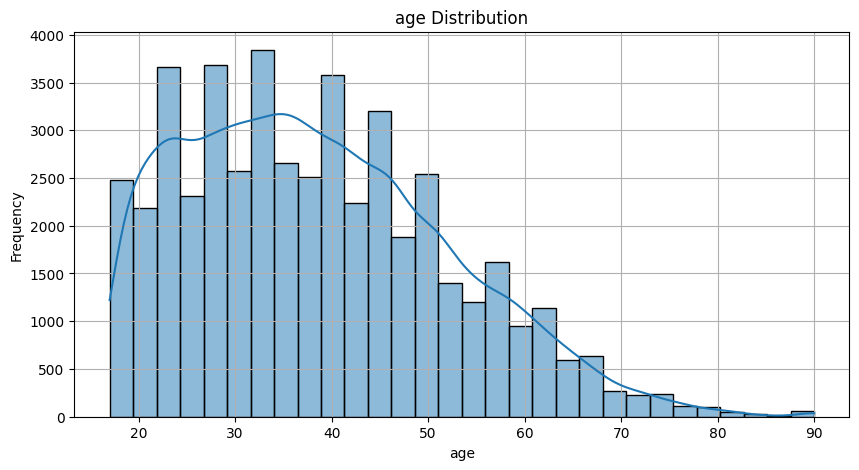

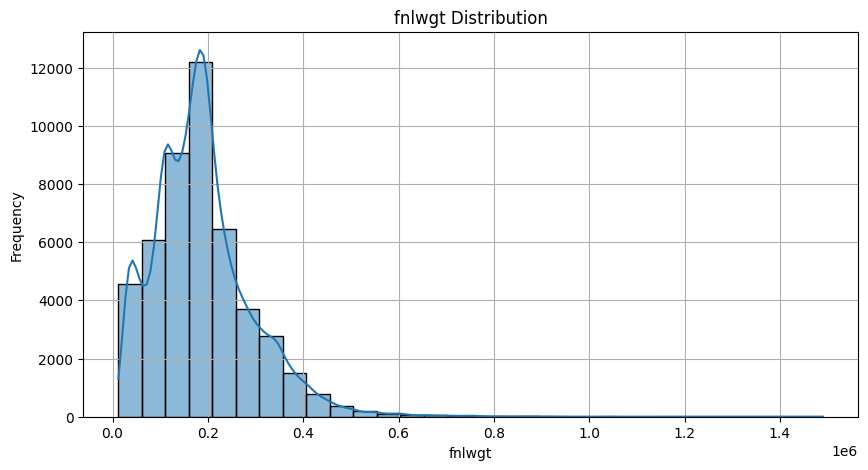

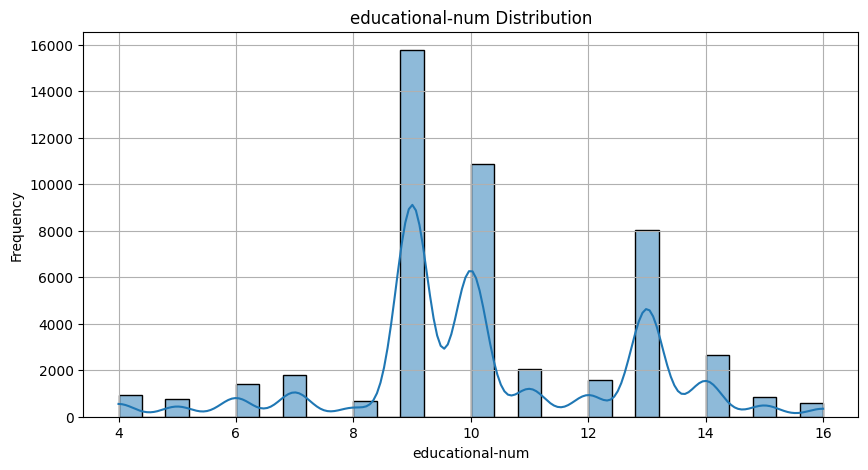

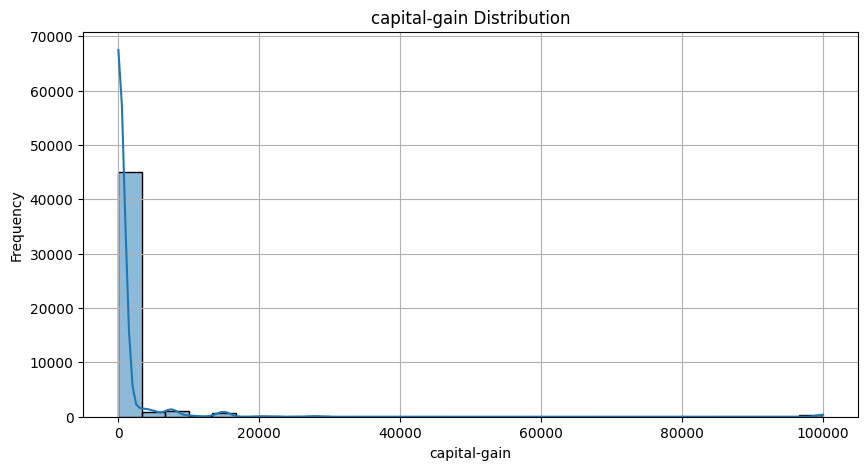

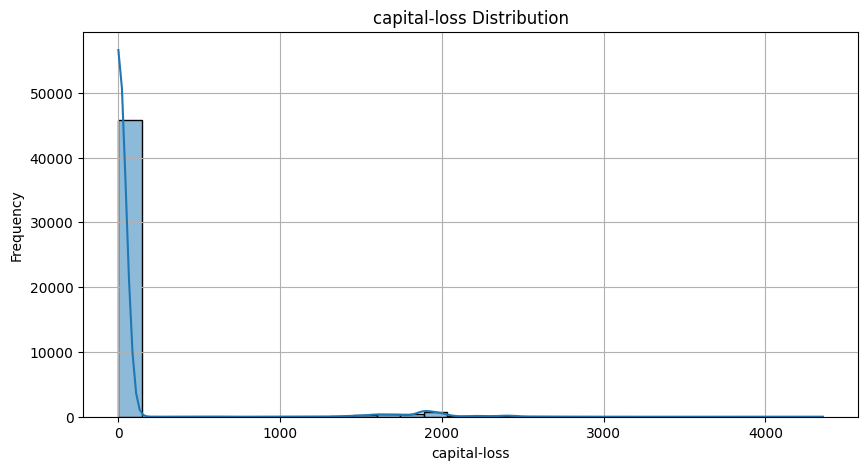

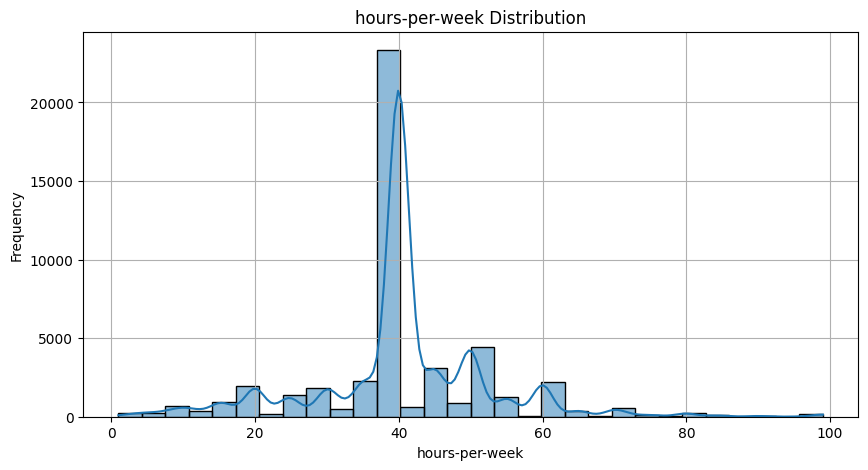

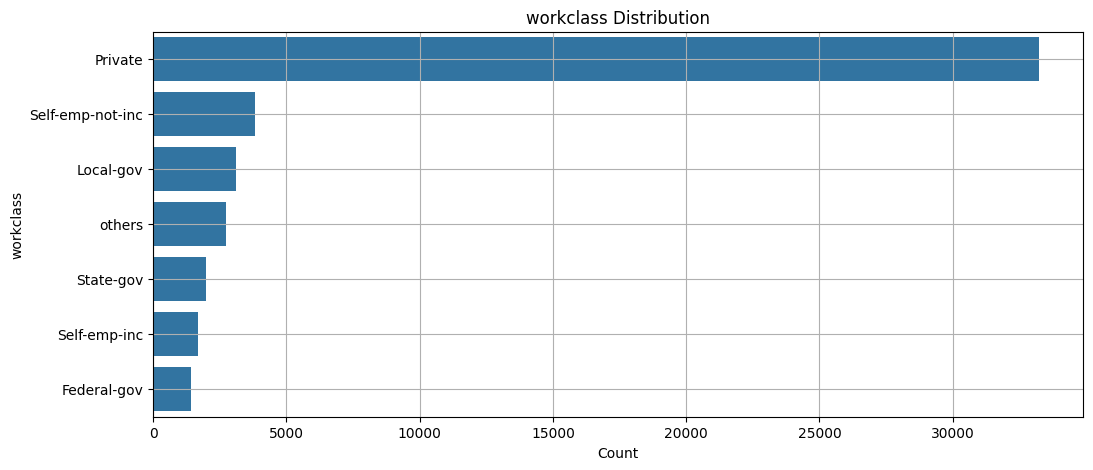

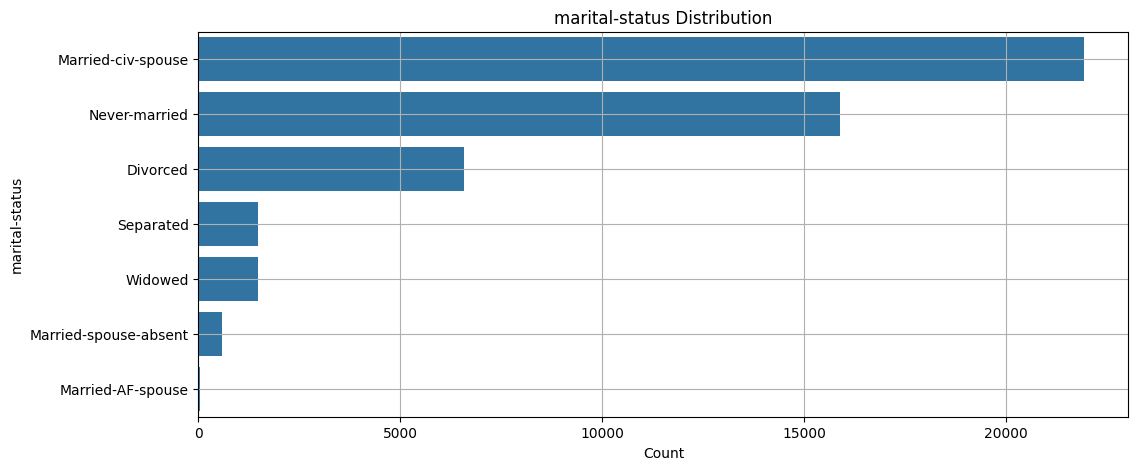

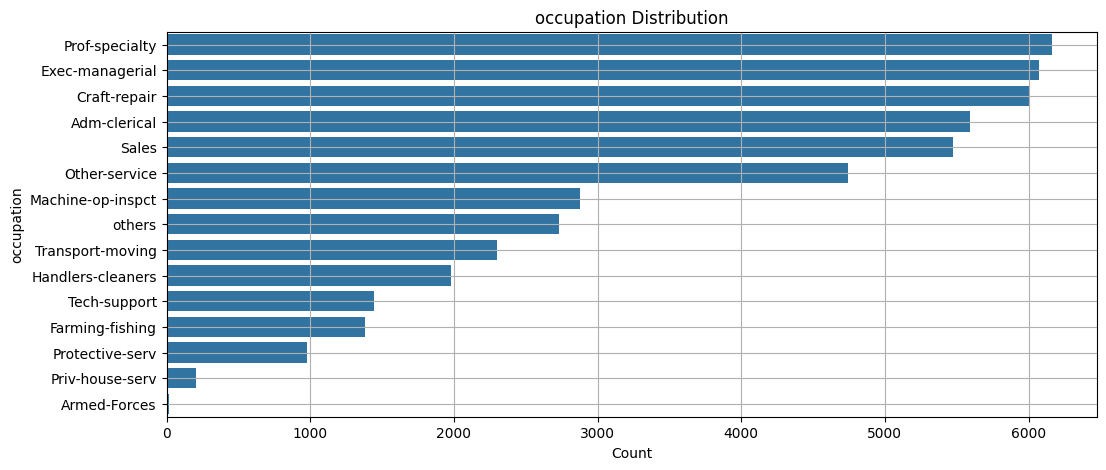

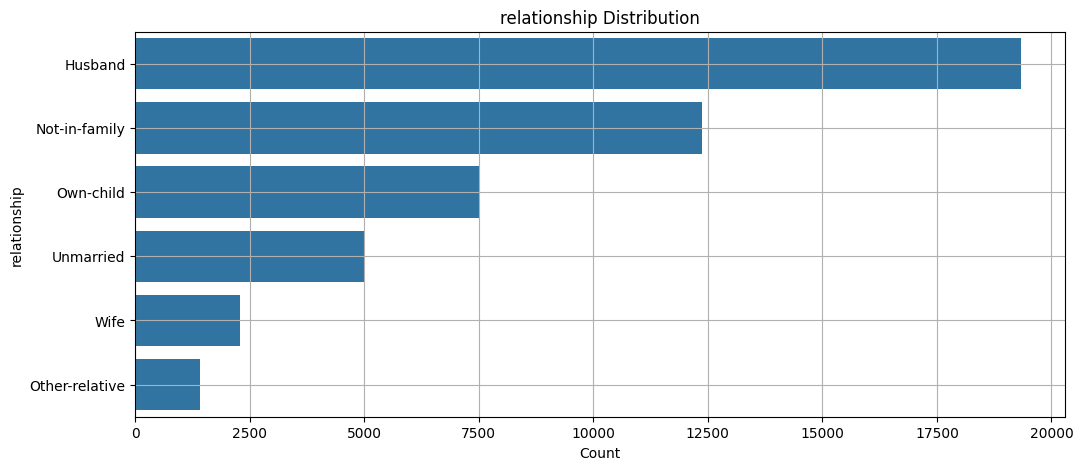

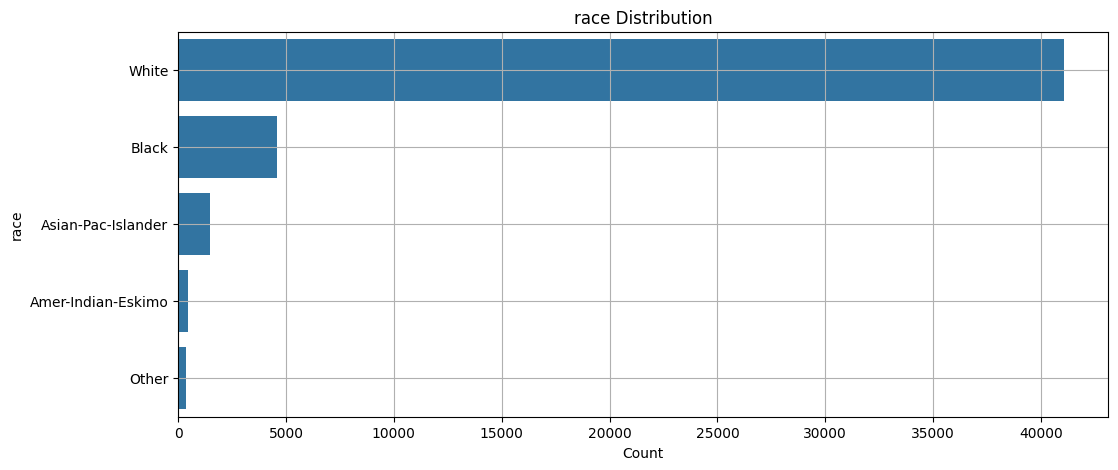

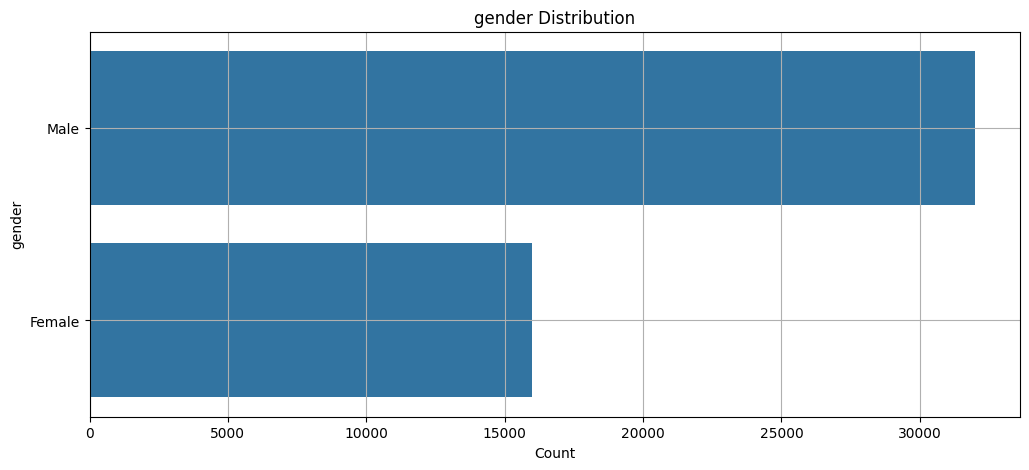

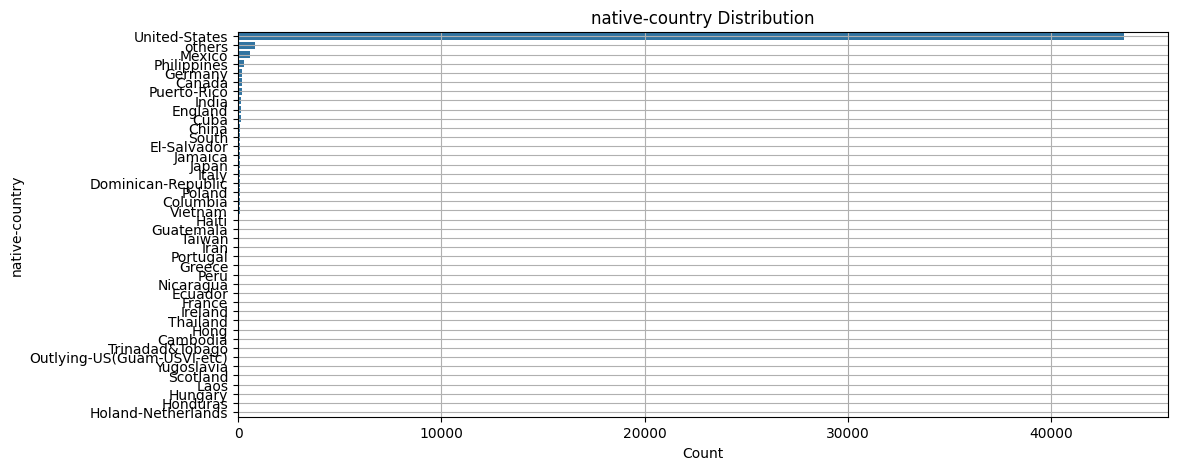

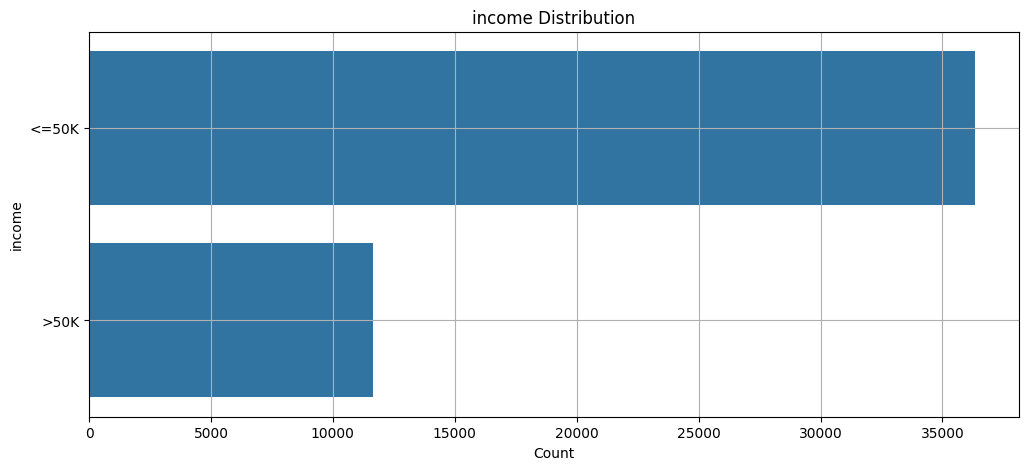

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Numerical Features: Histogram
num_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Categorical Features: Countplot
cat_cols = ['workclass', 'marital-status', 'occupation',
            'relationship', 'race', 'gender', 'native-country', 'income']

for col in cat_cols:
    plt.figure(figsize=(12, 5))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


#Outlier Handling


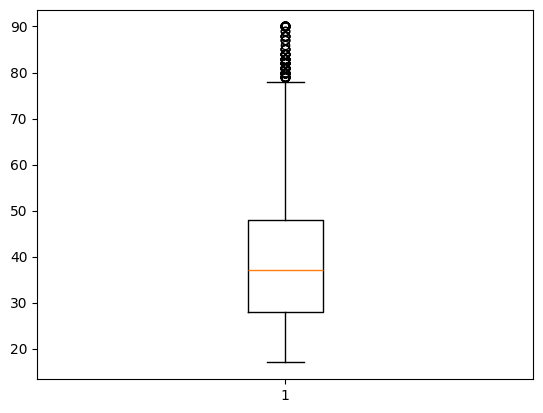

In [ ]:
#outlier
import matplotlib.pyplot as plt
plt.boxplot(data['age'])
plt.show()

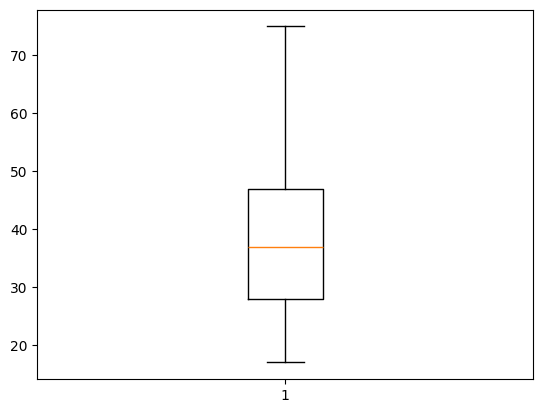

In [ ]:
# Removing Outliers from 'age' Column
data= data[(data['age']<=75)& (data['age']>=17)]
plt.boxplot(data['age'])
plt.show()

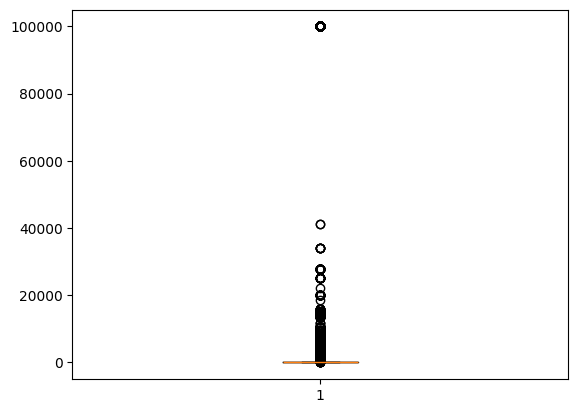

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

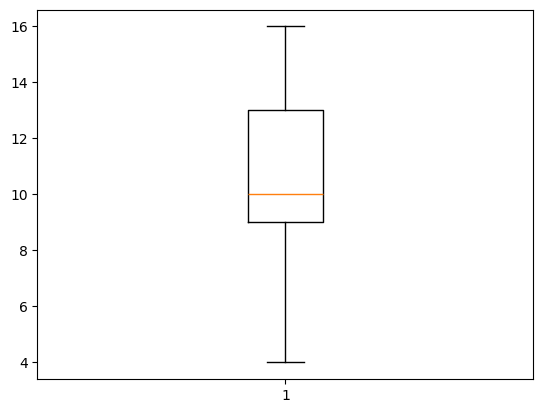

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

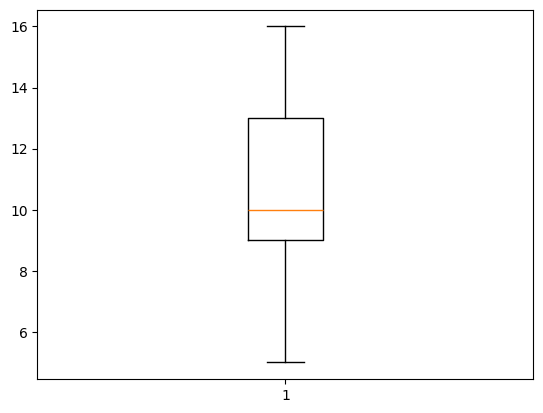

In [ ]:
#Removing Outliers from 'educational-num' Column
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]
plt.boxplot(data['educational-num'])
plt.show()

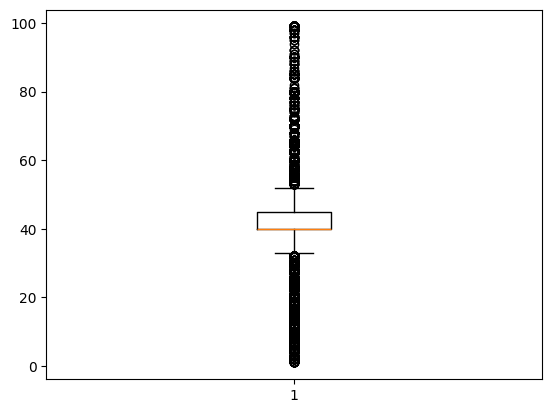

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [ ]:
data.shape

(46720, 14)

#Data Preprocessing for Modeling

In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,others,103497,10,Never-married,others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Categorical Data Encoding -> sklearn label encoder**

In [ ]:
#Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']

# Dictionary to store encoders for later use
encoders = {}

# Apply Label Encoding and print mappings
for col in categorical_cols:
    enc = LabelEncoder()
    data[col] = enc.fit_transform(data[col])
    encoders[col] = enc  # Save encoder for possible reverse transform

    # Print mapping
    print(f"🔠 {col} mapping:")
    for original_value, encoded_value in zip(enc.classes_, enc.transform(enc.classes_)):
        print(f"  {original_value} → {encoded_value}")
    print("\n" + "-"*40 + "\n")



🔠 workclass mapping:
  Federal-gov → 0
  Local-gov → 1
  Private → 2
  Self-emp-inc → 3
  Self-emp-not-inc → 4
  State-gov → 5
  others → 6

----------------------------------------

🔠 marital-status mapping:
  Divorced → 0
  Married-AF-spouse → 1
  Married-civ-spouse → 2
  Married-spouse-absent → 3
  Never-married → 4
  Separated → 5
  Widowed → 6

----------------------------------------

🔠 occupation mapping:
  Adm-clerical → 0
  Armed-Forces → 1
  Craft-repair → 2
  Exec-managerial → 3
  Farming-fishing → 4
  Handlers-cleaners → 5
  Machine-op-inspct → 6
  Other-service → 7
  Priv-house-serv → 8
  Prof-specialty → 9
  Protective-serv → 10
  Sales → 11
  Tech-support → 12
  Transport-moving → 13
  others → 14

----------------------------------------

🔠 relationship mapping:
  Husband → 0
  Not-in-family → 1
  Other-relative → 2
  Own-child → 3
  Unmarried → 4
  Wife → 5

----------------------------------------

🔠 race mapping:
  Amer-Indian-Eskimo → 0
  Asian-Pac-Islander → 1
  Bl

In [ ]:
data.dtypes

,0
age,int64
workclass,int64
fnlwgt,int64
educational-num,int64
marital-status,int64
occupation,int64
relationship,int64
race,int64
gender,int64
capital-gain,int64


**Normalization / Standardization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select only numerical columns for scaling
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the numerical data
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Display the transformed data
display(data.head())

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.137931,0.333333,0.145129,0.181818,0.666667,0.428571,0.6,0.5,1.0,0.000000,0.0,0.397959,0.926829,<=50K
1,0.362069,0.333333,0.052451,0.363636,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.500000,0.926829,<=50K
2,0.189655,0.166667,0.219649,0.636364,0.333333,0.714286,0.0,1.0,1.0,0.000000,0.0,0.397959,0.926829,>50K
3,0.465517,0.333333,0.100153,0.454545,0.333333,0.428571,0.0,0.5,1.0,0.076881,0.0,0.397959,0.926829,>50K
4,0.017241,1.000000,0.061708,0.454545,0.666667,1.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.926829,<=50K


In [ ]:
x=data.drop(columns=['income']) #input
y=data['income']

#y = f(x) - independent variable(features)
#y - dependent variable (target variable)

x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,0.137931,0.333333,0.145129,0.181818,0.666667,0.428571,0.6,0.5,1.0,0.000000,0.0,0.397959,0.926829
1,0.362069,0.333333,0.052451,0.363636,0.333333,0.285714,0.0,1.0,1.0,0.000000,0.0,0.500000,0.926829
2,0.189655,0.166667,0.219649,0.636364,0.333333,0.714286,0.0,1.0,1.0,0.000000,0.0,0.397959,0.926829
3,0.465517,0.333333,0.100153,0.454545,0.333333,0.428571,0.0,0.5,1.0,0.076881,0.0,0.397959,0.926829
4,0.017241,1.000000,0.061708,0.454545,0.666667,1.000000,0.6,1.0,0.0,0.000000,0.0,0.295918,0.926829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.172414,0.333333,0.165763,0.636364,0.333333,0.857143,1.0,1.0,0.0,0.000000,0.0,0.377551,0.926829
48838,0.396552,0.333333,0.096129,0.363636,0.333333,0.428571,0.0,1.0,1.0,0.000000,0.0,0.397959,0.926829
48839,0.706897,0.333333,0.094462,0.363636,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.926829
48840,0.086207,0.333333,0.128004,0.363636,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.926829


In [ ]:
y

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


#Data Splitting and Balancing

**Split the Dataset into Training and Test Sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23, stratify=y)

In [ ]:
x_train.shape

(37376, 13)

In [ ]:
x_train.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
42555,0.396552,0.666667,0.362880,0.363636,0.333333,0.142857,0.0,1.0,1.0,0.0,0.0,0.142857,0.926829
25132,0.844828,0.333333,0.193861,0.454545,0.333333,0.714286,0.0,1.0,1.0,0.0,0.0,0.397959,0.024390
18127,0.068966,1.000000,0.102414,0.454545,0.666667,1.000000,0.6,1.0,0.0,0.0,0.0,0.397959,0.926829
18403,0.103448,0.333333,0.126367,0.363636,0.666667,0.714286,0.6,0.5,1.0,0.0,0.0,0.153061,0.926829
28816,0.534483,0.333333,0.088800,0.363636,0.000000,0.928571,0.2,1.0,1.0,0.0,0.0,0.397959,0.926829


In [ ]:
x_test.shape

(9344, 13)

**Balance the dataset**

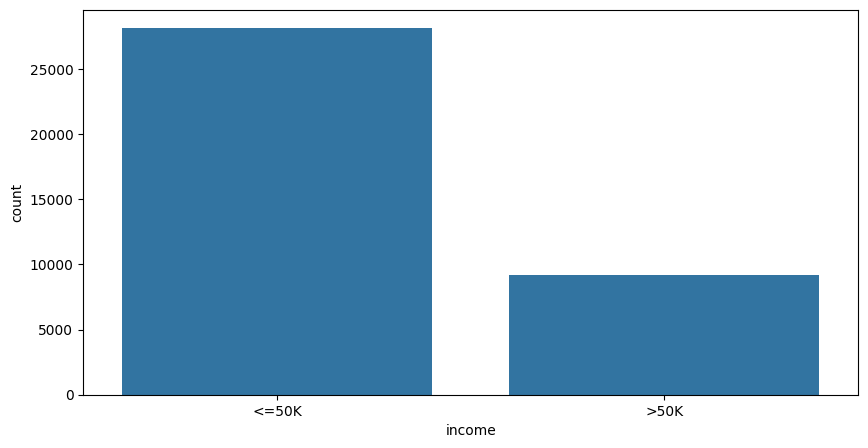

In [ ]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = y_train)
plt.show()

In [ ]:
!pip install imbalanced-learn

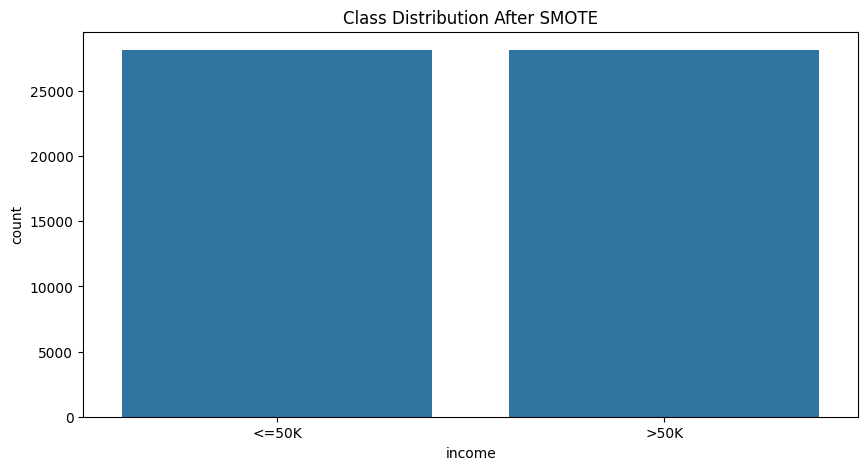

Original dataset shape: (37376, 13) (37376,)
Resampled dataset shape: (56306, 13) (56306,)


In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x_train, y_train)

# Display the new class distribution
plt.figure(figsize = (10, 5))
sns.countplot(x = y_balanced)
plt.title('Class Distribution After SMOTE')
plt.show()

print("Original dataset shape:", x_train.shape, y_train.shape)
print("Resampled dataset shape:", x_balanced.shape, y_balanced.shape)

#Model Training and Evaluation

**Import Models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**KNeighborsClassifier**

In [ ]:
#Machine Learning Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train) #input and output training data
predict=knn.predict(x_test)
print("KNNn Accuracy:", accuracy_score(y_test, predict))
print("KNN Classification Report:\n", classification_report(y_test, predict))

KNNn Accuracy: 0.8249143835616438
KNN Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7038
        >50K       0.67      0.58      0.62      2306

    accuracy                           0.82      9344
   macro avg       0.77      0.74      0.75      9344
weighted avg       0.82      0.82      0.82      9344



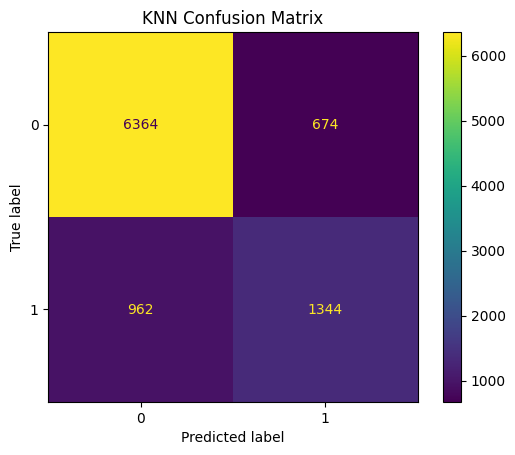

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title('KNN Confusion Matrix')
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predict1=lr.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, predict1))
print("Logistic Regression Classification Report:\n", classification_report(y_test, predict1))

Logistic Regression Accuracy: 0.8224529109589042
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7038
        >50K       0.72      0.45      0.56      2306

    accuracy                           0.82      9344
   macro avg       0.78      0.70      0.72      9344
weighted avg       0.81      0.82      0.81      9344



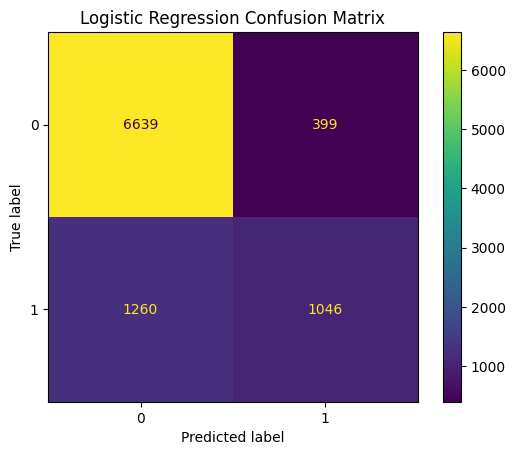

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lr = confusion_matrix(y_test, predict1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam', hidden_layer_sizes=(5,2), random_state=2, max_iter=2000)
clf.fit(x_train,y_train)
predict2=clf.predict(x_test)
print("MLP Classifier Accuracy:", accuracy_score(y_test, predict2))
print("MLP Classifier Classification Report:\n", classification_report(y_test, predict2))

MLP Classifier Accuracy: 0.8355094178082192
MLP Classifier Classification Report:
               precision    recall  f1-score   support

       <=50K       0.85      0.94      0.90      7038
        >50K       0.75      0.51      0.60      2306

    accuracy                           0.84      9344
   macro avg       0.80      0.72      0.75      9344
weighted avg       0.83      0.84      0.82      9344



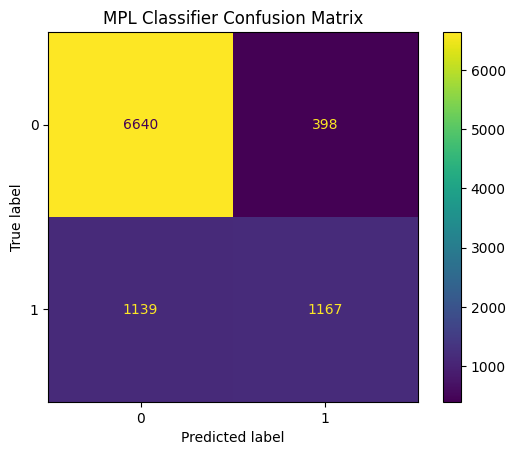

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_mpl = confusion_matrix(y_test, predict2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mpl)
disp.plot()
plt.title('MPL Classifier Confusion Matrix')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
           "LogisticRegression": LogisticRegression(),
           "RandomForest": RandomForestClassifier(),
           "KNN": KNeighborsClassifier(),
           "SVM": SVC(),
           "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
  pipe = Pipeline([
       ('scaler', StandardScaler()),
        ('model', model)
        ])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  results[name] = acc
  print(f"{name} Accuracy: {acc:.4f}")
  print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8156
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.70      0.46      0.56      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.82      0.80      9344

RandomForest Accuracy: 0.8503
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.85      9344

KNN Accuracy: 0.8247
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7010
        >50K       0.67      0.59      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

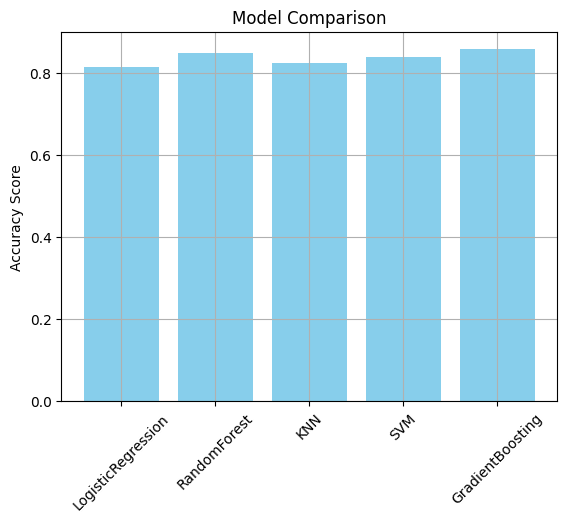

In [ ]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Model Saving and Prediction with New Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.8144
RandomForest: 0.8500
KNN: 0.8203
SVM: 0.8395
GradientBoosting: 0.8584

✅ Best model: GradientBoosting with accuracy 0.8584
✅ Saved best model as best_model.pkl


In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the saved model
best_model = joblib.load("best_model.pkl")

# Load the original data to fit scalers and encoders
# This is important to ensure consistent preprocessing
original_data = pd.read_csv("/content/adult.csv")

# Reapply the data cleaning and preprocessing steps to a temporary copy of the original data
temp_data = original_data.copy()

# Handle missing values
temp_data['occupation'] = temp_data['occupation'].replace({'?':'others'})
temp_data['native-country'] = temp_data['native-country'].replace({'?':'others'})
temp_data['workclass'] = temp_data['workclass'].replace({'?':'others'})

# Removing redundant categories
temp_data = temp_data[temp_data['workclass'] != 'Without-pay' ]
temp_data = temp_data[temp_data['workclass'] != 'Never-worked' ]
temp_data = temp_data[temp_data['education'] != '5th-6th' ]
temp_data = temp_data[temp_data['education'] != '1st-4th' ]
temp_data = temp_data[temp_data['education'] != 'Preschool' ]

# Drop redundant education column
temp_data.drop(columns=['education'], inplace=True)

# Apply Label Encoding and fit encoders on the temporary data
categorical_cols = ['workclass', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country']
encoders = {}
for col in categorical_cols:
    enc = LabelEncoder()
    temp_data[col] = enc.fit_transform(temp_data[col])
    encoders[col] = enc

# Fit the MinMaxScaler on the temporary data
scaler = MinMaxScaler()
numerical_cols = temp_data.select_dtypes(include=['int64', 'float64']).columns
scaler.fit(temp_data[numerical_cols]) # Fit the scaler

def preprocess_single_input(input_data, encoders, scaler, numerical_cols):
    """
    Applies the same preprocessing steps to a single input data point.

    Args:
        input_data (dict): A dictionary containing the input features.
        encoders (dict): A dictionary of fitted LabelEncoders.
        scaler (MinMaxScaler): A fitted MinMaxScaler.
        numerical_cols (list): List of numerical column names.

    Returns:
        pd.DataFrame: The preprocessed input data as a DataFrame.
    """
    # Create a DataFrame from the input dictionary
    input_df = pd.DataFrame([input_data])

    # Apply Label Encoding to categorical columns
    for col, encoder in encoders.items():
        if col in input_df.columns:
             # Handle potential unseen labels by transforming only if the label is in known classes
            input_df[col] = input_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1) # Or some other value indicating unseen

    # Apply Min-Max Scaling to numerical columns
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

    return input_df

# Example single input (replace with your desired values)
single_input = {
    'age': 35,
    'workclass': 'Private',
    'fnlwgt': 250000,
    'educational-num': 13, # Corresponds to Bachelors
    'marital-status': 'Married-civ-spouse',
    'occupation': 'Exec-managerial',
    'relationship': 'Husband',
    'race': 'White',
    'gender': 'Male',
    'capital-gain': 2000,
    'capital-loss': 0,
    'hours-per-week': 40,
    'native-country': 'United-States'
}

# Preprocess the single input
preprocessed_input = preprocess_single_input(single_input, encoders, scaler, numerical_cols)

# Make a prediction using the best model
prediction = best_model.predict(preprocessed_input)

print(f"\nPrediction for the single input: {prediction[0]}")


Prediction for the single input: >50K


#Streamlit Application Deployment

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np # Import numpy for handling potential unseen values

# Load the saved model
model = joblib.load("best_model.pkl")

# Load the original data to fit scalers and encoders
# This is crucial for consistent preprocessing
try:
    original_data = pd.read_csv("/content/adult.csv")
except FileNotFoundError:
    st.error("Error: adult.csv not found. Please upload the dataset to /content/adult.csv")
    st.stop()


# --- Preprocessing Setup (Fit scalers and encoders on the original data) ---
temp_data_for_fitting = original_data.copy()

# Handle missing values for fitting
temp_data_for_fitting['occupation'] = temp_data_for_fitting['occupation'].replace({'?':'others'})
temp_data_for_fitting['native-country'] = temp_data_for_fitting['native-country'].replace({'?':'others'})
temp_data_for_fitting['workclass'] = temp_data_for_fitting['workclass'].replace({'?':'others'})

# Removing redundant categories for fitting
temp_data_for_fitting = temp_data_for_fitting[temp_data_for_fitting['workclass'] != 'Without-pay' ]
temp_data_for_fitting = temp_data_for_fitting[temp_data_for_fitting['workclass'] != 'Never-worked' ]
temp_data_for_fitting = temp_data_for_fitting[temp_data_for_fitting['education'] != '5th-6th' ]
temp_data_for_fitting = temp_data_for_fitting[temp_data_for_fitting['education'] != '1st-4th' ]
temp_data_for_fitting = temp_data_for_fitting[temp_data_for_fitting['education'] != 'Preschool' ]

# Drop redundant education column for fitting
temp_data_for_fitting.drop(columns=['education'], inplace=True)


# Fit Label Encoders
categorical_cols_to_encode = ['workclass', 'marital-status', 'occupation',
                              'relationship', 'race', 'gender', 'native-country']
encoders = {}
for col in categorical_cols_to_encode:
    enc = LabelEncoder()
    # Fit on combined data to handle all possible categories
    all_categories = original_data[col].unique().tolist()
    if '?' in all_categories:
      all_categories.remove('?')
      all_categories.append('others')
    # Ensure consistent order of classes
    all_categories.sort()
    enc.fit(all_categories)
    encoders[col] = enc

# Fit MinMaxScaler
numerical_cols_for_scaling = temp_data_for_fitting.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
scaler.fit(temp_data_for_fitting[numerical_cols_for_scaling])


# --- Preprocessing Function ---
def preprocess_input(input_df, encoders, scaler, numerical_cols):
    """
    Applies the same preprocessing steps to the input DataFrame from Streamlit.

    Args:
        input_df (pd.DataFrame): DataFrame containing the input features.
        encoders (dict): A dictionary of fitted LabelEncoders.
        scaler (MinMaxScaler): A fitted MinMaxScaler.
        numerical_cols (list): List of numerical column names used for scaling.

    Returns:
        pd.DataFrame: The preprocessed input data as a DataFrame.
    """
    processed_df = input_df.copy()

    # Handle missing values (assuming '?' is replaced by 'others' in the form or handled here)
    # For simplicity, we'll assume the form handles basic replacement or we handle it here
    for col in ['workclass', 'occupation', 'native-country']:
        if col in processed_df.columns:
            processed_df[col] = processed_df[col].replace({np.nan: 'others', '?': 'others'}) # Handle potential NaN from form as well

    # Apply Label Encoding
    for col, encoder in encoders.items():
        if col in processed_df.columns:
            # Ensure consistent order and handle potential unseen labels
            processed_df[col] = processed_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1) # Handle unseen with -1 or another strategy

    # Ensure numerical columns are present before scaling
    for col in numerical_cols:
        if col not in processed_df.columns:
             processed_df[col] = 0 # Add missing numerical columns with a default value if necessary

    # Apply Min-Max Scaling
    processed_df[numerical_cols] = scaler.transform(processed_df[numerical_cols])


    # Ensure all required columns are present in the processed_df in the correct order
    # This is important if the model expects features in a specific order
    # Get the list of columns the model was trained on (excluding the target)
    model_trained_cols = temp_data_for_fitting.drop(columns=['income']).columns.tolist()

    # Add any missing columns to the processed_df with a default value (e.g., 0)
    for col in model_trained_cols:
        if col not in processed_df.columns:
            processed_df[col] = 0

    # Reorder columns to match the training data
    processed_df = processed_df[model_trained_cols]


    return processed_df


# 🔹 Set page config
st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

# 🔹 Custom CSS for styling
st.markdown("""
    <style>
    /* Gradient background */
    body {
        background: linear-gradient(to right, #e0c3fc, #8ec5fc);
    }

    /* Main content area styling */
    .main {
        background-color: rgba(255, 255, 255, 0.85);
        padding: 2rem;
        border-radius: 15px;
        box-shadow: 0px 0px 10px rgba(0,0,0,0.1);
    }

    /* Title style */
    h1 {
        color: #4B0082;
        font-weight: 700;
        text-shadow: 1px 1px 2px #fff;
    }

    /* Button style */
    .stButton > button {
        background: linear-gradient(to right, #FF512F, #DD2476);
        color: white;
        border: none;
        border-radius: 12px;
        padding: 0.75rem 2rem;
        font-weight: bold;
        font-size: 16px;
    }

    .stButton > button:hover {
        background: linear-gradient(to right, #DD2476, #FF512F);
        color: white;
    }

    /* Sidebar header */
    .sidebar .sidebar-content {
        background: linear-gradient(to bottom, #fceabb, #f8b500);
    }

    /* Smaller tweaks */
    .stMarkdown h3 {
        color: #2e2e2e;
        margin-top: 1rem;
    }
    </style>
""", unsafe_allow_html=True)


# App Title
st.title("💼 Employee Salary Classification App")
st.markdown("##### Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar Inputs (Update these to match the features used by your model)
# Refer to the columns in your 'data' DataFrame after preprocessing in the notebook
st.sidebar.header("📋 Input Employee Details")

# Get unique values for dropdowns from the original data (after replacing '?')
workclass_options = sorted(original_data['workclass'].replace({'?':'others'}).unique().tolist())
marital_status_options = sorted(original_data['marital-status'].unique().tolist())
occupation_options = sorted(original_data['occupation'].replace({'?':'others'}).unique().tolist())
relationship_options = sorted(original_data['relationship'].unique().tolist())
race_options = sorted(original_data['race'].unique().tolist())
gender_options = sorted(original_data['gender'].unique().tolist())
native_country_options = sorted(original_data['native-country'].replace({'?':'others'}).unique().tolist())
education_num_min = int(original_data['educational-num'].min())
education_num_max = int(original_data['educational-num'].max())


age = st.sidebar.slider("Age", int(original_data['age'].min()), int(original_data['age'].max()), 30) # Use original data min/max
workclass = st.sidebar.selectbox("Workclass", workclass_options)
fnlwgt = st.sidebar.number_input("Fnlwgt", int(original_data['fnlwgt'].min()), int(original_data['fnlwgt'].max()), 189664) # Use original data min/max, mean as default
educational_num = st.sidebar.slider("Educational Number", education_num_min, education_num_max, 10)
marital_status = st.sidebar.selectbox("Marital Status", marital_status_options)
occupation = st.sidebar.selectbox("Occupation", occupation_options)
relationship = st.sidebar.selectbox("Relationship", relationship_options)
race = st.sidebar.selectbox("Race", race_options)
gender = st.sidebar.selectbox("Gender", gender_options)
capital_gain = st.sidebar.number_input("Capital Gain", int(original_data['capital-gain'].min()), int(original_data['capital-gain'].max()), 0)
capital_loss = st.sidebar.number_input("Capital Loss", int(original_data['capital-loss'].min()), int(original_data['capital-loss'].max()), 0)
hours_per_week = st.sidebar.slider("Hours per week", int(original_data['hours-per-week'].min()), int(original_data['hours-per-week'].max()), 40)
native_country = st.sidebar.selectbox("Native Country", native_country_options)


# Build input DataFrame
input_data = {
    'age': age,
    'workclass': workclass,
    'fnlwgt': fnlwgt,
    'educational-num': educational_num,
    'marital-status': marital_status,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': native_country
}
input_df = pd.DataFrame([input_data])


# Show Input Data
st.write("### 🔎 Input Data")
st.dataframe(input_df)

# Predict Button
if st.button("Predict Salary Class"):
    # Preprocess the input data
    preprocessed_input_df = preprocess_input(input_df.copy(), encoders, scaler, numerical_cols_for_scaling)

    # Make a prediction using the best model
    prediction = model.predict(preprocessed_input_df)

    st.success(f"✅ Prediction: **{prediction[0]}**")

# Divider
st.markdown("---")

# Batch Prediction Section (Update this to also use the preprocessing function)
st.markdown("### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded Data Preview:", batch_data.head())

    # Preprocess the batch data
    preprocessed_batch_data = preprocess_input(batch_data.copy(), encoders, scaler, numerical_cols_for_scaling)

    # Make batch predictions
    batch_preds = model.predict(preprocessed_batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.dataframe(batch_data.head())

    # Download CSV
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("⬇️ Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [ ]:
!pip install streamlit

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.80.120.72


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.80.120.72:8501

⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://bright-doors-stay.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:23443 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙  Stopping...
